## **K-Prototypes**
**K-Prototypes** is one of the most practical algorithms for **clustering mixed datasets (numeric + categorical)** 

---

# 🟢 K-Prototypes Clustering

### 1. Why do we need it?

* **KMeans** works only with **numeric** data (uses Euclidean distance).
* **KModes** works only with **categorical** data (uses matching dissimilarity).
* **K-Prototypes** combines both → can cluster **mixed data**.

---

### 2. How does it work?

The algorithm tries to **minimize the cost function** by grouping data points into clusters based on both **numerical similarity** and **categorical matching**.

#### Step 1: Initialization

* Choose `k` (number of clusters).
* Randomly pick `k` data points as initial cluster prototypes.
* Each prototype = **centroid for numerics + mode for categoricals**.

#### Step 2: Assignment of Points

* For each data point, compute the **distance to each prototype**:

$$
d(x,y) = \sum_{j \in \text{numerical}} (x_j - y_j)^2 + \gamma \cdot \sum_{j \in \text{categorical}} \delta(x_j, y_j)
$$

* $\delta(x_j, y_j) = 0$ if same category, $1$ if different.
* $\gamma$ = weighting factor (balances numeric vs categorical influence).
* γ is chosen automatically in the kmodes package implementation (it uses the average standard deviation of numeric features)
* Each point is assigned to the cluster with the smallest distance.

#### Step 3: Update Prototypes

* For **numeric attributes** → update to the **mean** of all points in the cluster.
* For **categorical attributes** → update to the **mode** (most frequent category).

#### Step 4: Repeat

* Reassign points → update prototypes → until cluster assignments stop changing (convergence).

---

### 3. Example (In this dataset "Salaries")

Imagine clustering university employees (`Salaries.csv`) using:

* Numeric: `phd`, `service`, `salary`

* Categorical: `rank`, `discipline`, `sex`

* Numeric distance: compares salary differences, years of service, etc.

* Categorical distance: compares job rank, gender, discipline.

* K-Prototypes balances both to form meaningful groups (e.g., *senior male professors with high salaries* vs. *junior female assistant professors*).

---

### 4. Advantages

* Handles mixed data directly.
* Scales to large datasets.
* Intuitive (like KMeans).

### 5. Limitations

* Still requires choosing `k`.
* Sensitive to initialization.
* Choice of γ (gamma) matters.

---

📌 **Summary:**
K-Prototypes = **KMeans (numeric) + KModes (categorical)**.
It uses **mean for numbers** and **mode for categories** when updating cluster centers.

---

In [9]:
# Install Gower distance metric function
!pip install gower

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("Salaries.csv")
df

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


In [7]:
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


## DBSCAN Clustering

In [17]:
import gower
from sklearn.cluster import DBSCAN

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(df)
print(gower_dist.shape)
print(gower_dist)

(78, 78)
[[0.         0.5617678  0.4600817  ... 0.47026396 0.6319286  0.6442096 ]
 [0.5617678  0.         0.10168613 ... 0.42483723 0.26317257 0.2508916 ]
 [0.4600817  0.10168613 0.         ... 0.37912259 0.20214993 0.18412788]
 ...
 [0.47026396 0.42483723 0.37912259 ... 0.         0.22833133 0.21030928]
 [0.6319286  0.26317257 0.20214993 ... 0.22833133 0.         0.01881693]
 [0.6442096  0.2508916  0.18412788 ... 0.21030928 0.01881693 0.        ]]


In [49]:
# DBSCAN clustering using Gower distance
db = DBSCAN(eps=0.19, min_samples=3, metric="precomputed")
clusters = db.fit_predict(gower_dist)

df["Cluster_DBSCAN"] = clusters
df.head(10)

,rank,discipline,phd,service,sex,salary,Cluster_DBSCAN
0,Prof,B,56,49,Male,186960,0
1,Prof,A,12,6,Male,93000,0
2,Prof,A,23,20,Male,110515,0
3,Prof,A,40,31,Male,131205,0
4,Prof,B,20,18,Male,104800,0
5,Prof,A,20,20,Male,122400,0
6,AssocProf,A,20,17,Male,81285,-1
7,Prof,A,18,18,Male,126300,0
8,Prof,A,29,19,Male,94350,0
9,Prof,A,51,51,Male,57800,0


In [51]:
set(clusters)

{-1, 0, 1}

## K-Prototypes clustering

In [60]:
from kmodes.kprototypes import KPrototypes

# Separate categorical and numeric
categorical_cols = ['rank', 'discipline', 'sex']
categorical_idx = [df.columns.get_loc(col) for \
                         col in categorical_cols]
# Convert dataframe to numpy
data_matrix = df.to_numpy()
print(categorical_idx)
print(data_matrix)

[0, 1, 4]
[['Prof' 'B' 56 49 'Male' 186960 0 2]
 ['Prof' 'A' 12 6 'Male' 93000 0 0]
 ['Prof' 'A' 23 20 'Male' 110515 0 1]
 ['Prof' 'A' 40 31 'Male' 131205 0 1]
 ['Prof' 'B' 20 18 'Male' 104800 0 1]
 ['Prof' 'A' 20 20 'Male' 122400 0 1]
 ['AssocProf' 'A' 20 17 'Male' 81285 -1 0]
 ['Prof' 'A' 18 18 'Male' 126300 0 1]
 ['Prof' 'A' 29 19 'Male' 94350 0 0]
 ['Prof' 'A' 51 51 'Male' 57800 0 0]
 ['Prof' 'B' 39 33 'Male' 128250 0 1]
 ['Prof' 'B' 23 23 'Male' 134778 0 2]
 ['AsstProf' 'B' 1 0 'Male' 88000 1 0]
 ['Prof' 'B' 35 33 'Male' 162200 0 2]
 ['Prof' 'B' 25 19 'Male' 153750 0 2]
 ['Prof' 'B' 17 3 'Male' 150480 0 2]
 ['AsstProf' 'B' 8 3 'Male' 75044 1 0]
 ['AsstProf' 'B' 4 0 'Male' 92000 1 0]
 ['Prof' 'A' 19 7 'Male' 107300 0 1]
 ['Prof' 'A' 29 27 'Male' 150500 0 2]
 ['AsstProf' 'B' 4 4 'Male' 92000 1 0]
 ['Prof' 'A' 33 30 'Male' 103106 0 1]
 ['AsstProf' 'A' 4 2 'Male' 73000 1 0]
 ['AsstProf' 'A' 2 0 'Male' 85000 1 0]
 ['Prof' 'A' 30 23 'Male' 91100 0 0]
 ['Prof' 'B' 35 31 'Male' 99418 0 1]

In [64]:
# Apply K-Prototypes
kproto = KPrototypes(n_clusters=3, random_state=42, \
                                      init='Huang')
clusters = kproto.fit_predict(data_matrix, \
                              categorical=categorical_idx)

df["Cluster_KPrototypes"] = clusters
print(df.head(10))

        rank discipline  phd  service   sex  salary  Cluster_DBSCAN  \
0       Prof          B   56       49  Male  186960               0   
1       Prof          A   12        6  Male   93000               0   
2       Prof          A   23       20  Male  110515               0   
3       Prof          A   40       31  Male  131205               0   
4       Prof          B   20       18  Male  104800               0   
5       Prof          A   20       20  Male  122400               0   
6  AssocProf          A   20       17  Male   81285              -1   
7       Prof          A   18       18  Male  126300               0   
8       Prof          A   29       19  Male   94350               0   
9       Prof          A   51       51  Male   57800               0   

   Cluster_KPrototypes  
0                    2  
1                    0  
2                    1  
3                    1  
4                    1  
5                    1  
6                    0  
7                 

In [68]:
set(df["Cluster_KPrototypes"])

{0, 1, 2}

In [23]:
set(df["Cluster_KPrototypes"])

{0, 1, 2}

### Performa PCA on original encoded dataset and visualize the data

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [40]:
# Define columns
categorical_cols = ['rank', 'discipline', 'sex']
numerical_cols = ['phd', 'service', 'salary']

In [42]:
# Preprocess: scale numerics, one-hot encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(df)


In [44]:
# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

# Add to dataframe
df['pc1'] = X_pca[:,0]
df['pc2'] = X_pca[:,1]


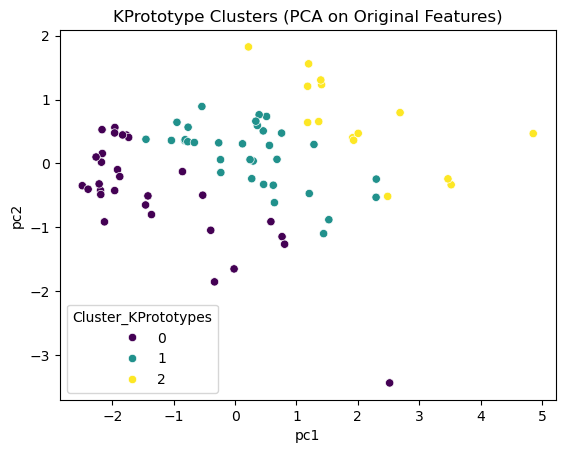

In [46]:
# Plot clusters (example: DBSCAN)
sns.scatterplot(data=df, x="pc1", y="pc2", hue="Cluster_KPrototypes", palette="viridis")
plt.title("KPrototype Clusters (PCA on Original Features)")
plt.show()